In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# experimental results of Streptavidin using Colabfold with highest ranked model
# read in the trajectory and obtain the topology
exp_result = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/test_76ce1_unrelaxed_rank_1_model_3.pdb')
exp_topology = exp_result.topology

# select indices of the atoms in the path (Cα atoms, backbone, side-chains)
exp_alpha_carbon_indices = exp_topology.select('name CA')
exp_backbone_indices = exp_topology.select('backbone')
exp_side_chain_indices = exp_topology.select('sidechain')

# compare with reference structure of Strepavidin obtained from Protein Data Bank
# read in the trajectory and obtain the topology
ref_result = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/3ry2.pdb')
ref_topology = ref_result.topology

# select indices of the atoms in the path (Cα atoms, backbone, side-chains)
ref_alpha_carbon_indices = ref_topology.select('name CA')
ref_backbone_indices = ref_topology.select('backbone')
ref_side_chain_indices = ref_topology.select('sidechain')

# calculate the RMSD between the experimental and reference structures for the Cα atoms, backbone, and side-chains
exp_alpha_carbon_rmsd = md.rmsd(exp_result, ref_result, atom_indices=exp_alpha_carbon_indices)
exp_backbone_rmsd = md.rmsd(exp_result, ref_result, atom_indices=exp_backbone_indices)
exp_side_chain_rmsd = md.rmsd(exp_result, ref_result, atom_indices=exp_side_chain_indices)

# print results
print('RMSD between experimental and reference structures for alpha-Carbon atoms: ', exp_alpha_carbon_rmsd)
print('RMSD between experimental and reference structures for backbone: ', exp_backbone_rmsd)
print('RMSD between experimental and reference structures for side-chains: ', exp_side_chain_rmsd)



RMSD between experimental and reference structures for alpha-Carbon atoms:  [0.9161299]
RMSD between experimental and reference structures for backbone:  [0.9471643]
RMSD between experimental and reference structures for side-chains:  [0.93611354]


In [11]:
# load experimental results of Streptavidin using AlphaFold2
# read in the trajectory for models 1-5 and obtain the topology
exp_result_1 = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/rcsb_pdb_3RY2/unrelaxed_model_1_pred_0.pdb')
exp_result_2 = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/rcsb_pdb_3RY2/unrelaxed_model_2_pred_0.pdb')
exp_result_3 = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/rcsb_pdb_3RY2/unrelaxed_model_3_pred_0.pdb')
exp_result_4 = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/rcsb_pdb_3RY2/unrelaxed_model_4_pred_0.pdb')
exp_result_5 = md.load('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week7/rcsb_pdb_3RY2/unrelaxed_model_5_pred_0.pdb')

# create list of RMSD values for each model to be appended to in for loop
exp_alpha_carbon_rmsd = []
exp_backbone_rmsd = []
exp_side_chain_rmsd = []

# iterate through the models and select indices of the atoms in the path (Cα atoms, backbone, side-chains)
# calcualte the RMSD between the experimental and reference structures for the Cα atoms, backbone, and side-chains
# append RMSD values to list and print RMSD values
for i in range(1,6):
    exp_topology = eval('exp_result_' + str(i)).topology
    exp_alpha_carbon_indices = exp_topology.select('name CA')
    exp_backbone_indices = exp_topology.select('backbone')
    exp_side_chain_indices = exp_topology.select('sidechain')
    exp_alpha_carbon_rmsd.append(md.rmsd(eval('exp_result_' + str(i)), ref_result, atom_indices=exp_alpha_carbon_indices))
    exp_backbone_rmsd.append(md.rmsd(eval('exp_result_' + str(i)), ref_result, atom_indices=exp_backbone_indices))
    exp_side_chain_rmsd.append(md.rmsd(eval('exp_result_' + str(i)), ref_result, atom_indices=exp_side_chain_indices))
    print('RMSD between experimental and reference structures for alpha-Carbon atoms for model ' + str(i) + ': ', exp_alpha_carbon_rmsd[i-1])
    print('RMSD between experimental and reference structures for backbone for model ' + str(i) + ': ', exp_backbone_rmsd[i-1])
    print('RMSD between experimental and reference structures for side-chains for model ' + str(i) + ': ', exp_side_chain_rmsd[i-1])
    print('')


RMSD between experimental and reference structures for alpha-Carbon atoms for model 1:  [0.9263412]
RMSD between experimental and reference structures for backbone for model 1:  [0.95673436]
RMSD between experimental and reference structures for side-chains for model 1:  [0.9468256]

RMSD between experimental and reference structures for alpha-Carbon atoms for model 2:  [0.9224961]
RMSD between experimental and reference structures for backbone for model 2:  [0.95345634]
RMSD between experimental and reference structures for side-chains for model 2:  [0.94529414]

RMSD between experimental and reference structures for alpha-Carbon atoms for model 3:  [0.9227172]
RMSD between experimental and reference structures for backbone for model 3:  [0.9536734]
RMSD between experimental and reference structures for side-chains for model 3:  [0.937685]

RMSD between experimental and reference structures for alpha-Carbon atoms for model 4:  [0.9132235]
RMSD between experimental and reference struct

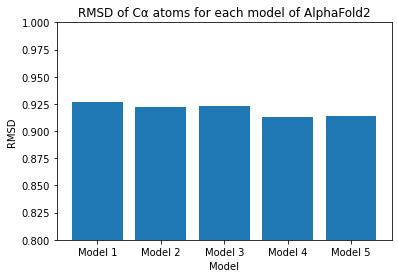

In [17]:
# create a bar chart of RMSD of Cα atoms for each model of AlphaFold2
# only accept size-1 arrays
exp_alpha_carbon_rmsd = np.array(exp_alpha_carbon_rmsd)
exp_alpha_carbon_rmsd = exp_alpha_carbon_rmsd.reshape(5,)

# create bar chart and scale y-axis to 0.5
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], exp_alpha_carbon_rmsd)
plt.ylim(0.8, 1.0)
plt.xlabel('Model')
plt.ylabel('RMSD')
plt.title('RMSD of Cα atoms for each model of AlphaFold2')
plt.show()


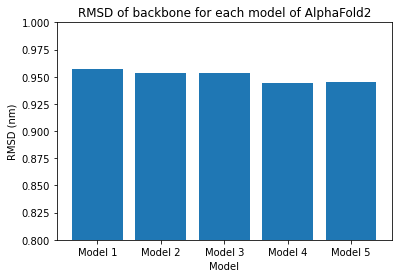

In [19]:
# create a bar chart of RMSD of backbone for each model of AlphaFold2
# only accept size-1 arrays
exp_backbone_rmsd = np.array(exp_backbone_rmsd)
exp_backbone_rmsd = exp_backbone_rmsd.reshape(5,)

# create bar chart
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], exp_backbone_rmsd)
plt.xlabel('Model')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of backbone for each model of AlphaFold2')
plt.ylim(0.8, 1.0)
plt.show()



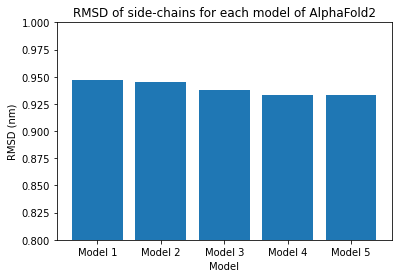

In [20]:
# create a bar chart of RMSD of side-chains for each model of AlphaFold2
# only accept size-1 arrays
exp_side_chain_rmsd = np.array(exp_side_chain_rmsd)
exp_side_chain_rmsd = exp_side_chain_rmsd.reshape(5,)

# create bar chart and scale y-axis between 0.8-1.0
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], exp_side_chain_rmsd)
plt.ylim(0.8, 1.0)
plt.xlabel('Model')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of side-chains for each model of AlphaFold2')
plt.show()


In [22]:
# intepretation of results
print("Based on the above figures, it appears that comparing the RMSD calculations obtained from AlphaFold2 and ColabFold,")
print("it appears that these two methods of predicting protein structures are very similar in their predictions.")


Based on the above figures, it appears that comparing the RMSD calculations obtained from AlphaFold2 and ColabFold,
it appears that these two methods of predicting protein structures are very similar in their predictions.


In [25]:
print("Model 2 is the most accurate model for Streptavidin, since it has the highest confidence score according")
print("to the ranking_debug.json file.")
print("We should also be confident in the predictions of residues 1-124.")

Model 2 is the most accurate model for Streptavidin, since it has the highest confidence score according
to the ranking_debug.json file.
We should also be confident in the predictions of residues 1-124.
